# Import libraries

In [2]:
import pandas as pd
import numpy as np
import os
import config
from joblib import dump, load
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from GMHI import GMHI

# Set constants

In [3]:
# set colors
healthy_color = "steelblue"
nonhealthy_color = 'orange'

# set figure details
figsize = (10, 10)
dpi = 200

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

filename = "coefficients.svg"

# Load model

In [4]:
gmhi2 = load(os.path.join(config.MODEL_DIR, "gmhi2_model.joblib"))
gmhi2

LogisticRegression(C=0.03, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

# Load validation data

In [5]:
X_cv = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features_cv.csv"), index_col=[0, 1])
is_healthy_cv = pd.read_csv(os.path.join(config.CLEAN_DIR, "is_healthy_cv.csv"), index_col=[0, 1])
phenotype_cv = pd.read_csv(os.path.join(config.CLEAN_DIR, "phenotype_cv.csv"), index_col=[0, 1])
time_point_cv = pd.read_csv(os.path.join(config.CLEAN_DIR, "time_point_cv.csv"), index_col=[0, 1])
display(X_cv.head())
display(is_healthy_cv.head())
display(phenotype_cv.head())
display(time_point_cv.head())

k__Archaea  k__Archaea|p__Euryarchaeota  \
Study_ID Subject_ID                                            
P65      ERAS10         0.00000                      0.00000   
         ERAS10         0.00000                      0.00000   
         ERAS10         0.00000                      0.00000   
         ERAS10         0.00000                      0.00000   
         ERAS11         0.02755                      0.02755   

                     k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Study_ID Subject_ID                                                   
P65      ERAS10                                             0.00000   
         ERAS10                                             0.00000   
         ERAS10                                             0.00000   
         ERAS10                                             0.00000   
         ERAS11                                             0.02755   

                     k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Study_ID Subject_ID                                                                         
P65      ERAS10                                                0.00000                      
         ERAS10                                                0.00000                      
         ERAS10                                                0.00000                      
         ERAS10                                                0.00000                      
         ERAS11                                                0.02755                      

                     k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
Study_ID Subject_ID                                                                                                
P65      ERAS10                                                0.00000                                             
         ERAS10                                                0.00000                                             
         ERAS10                                                0.00000                                             
         ERAS10                                                0.00000                                             
         ERAS11                                                0.02755                                             

                     k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
Study_ID Subject_ID                                                                                                                      
P65      ERAS10                                               0.000000                                                                   
         ERAS10                                               0.000000                                                                   
         ERAS10                                               0.000000                                                                   
         ERAS10                                               0.000000                                                                   
         ERAS11                                               0.026885                                                                   

                     k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_oralis  \
Study_ID Subject_ID                                                                                                                                                   
P65      ERAS10                                                    0.0                                                                                                
         ERAS10                                                    0.0                                                                       

Health status
Study_ID Subject_ID               
P65      ERAS10               True
         ERAS10               True
         ERAS10               True
         ERAS10               True
         ERAS11               True

Health status
Study_ID Subject_ID              
P65      ERAS10           Healthy
         ERAS10           Healthy
         ERAS10           Healthy
         ERAS10           Healthy
         ERAS11           Healthy

Time point
Study_ID Subject_ID           
P65      ERAS10             D0
         ERAS10           D180
         ERAS10            D42
         ERAS10             D8
         ERAS11             D0

In [6]:
features = gmhi2.feature_names_in_

In [7]:
missing_features = set(features) - set(X_cv.columns)

In [8]:
zeros = pd.DataFrame(np.zeros((X_cv.shape[0], len(missing_features))), index=X_cv.index, columns=missing_features)
zeros

k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Caudovirales|f__Siphoviridae|g__Rer2virus  \
Study_ID Subject_ID                                                                                                            
P65      ERAS10                                                    0.0                                                         
         ERAS10                                                    0.0                                                         
         ERAS10                                                    0.0                                                         
         ERAS10                                                    0.0                                                         
         ERAS11                                                    0.0                                                         
...                                                                ...                                                         
P116     22                                                        0.0                                                         
         23                                                        0.0                                                         
         24                                                        0.0                                                         
         63                                                        0.0                                                         
         31                                                        0.0                                                         

                     k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_zymae  \
Study_ID Subject_ID                                                                                                                        
P65      ERAS10                                                    0.0                                                                     
         ERAS10                                                    0.0                                                                     
         ERAS10                                                    0.0                                                                     
         ERAS10                                                    0.0                                                                     
         ERAS11                                                    0.0                                                                     
...                                                                ...                                                                     
P116     22                                                        0.0                                                                     
         23                                                        0.0                                                                     
         24                                                        0.0                                                                     
         63                                                        0.0                                                                     
         31                                                        0.0                                                                     

                     k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_lindneri  \
Study_ID Subject_ID                                                                                                                           
P65      ERAS10                                                    0.0                                                                        
         ERAS10                                                    0.0                                    

In [9]:
augmented = pd.concat([zeros, X_cv], axis=1)[features]

In [13]:
studies = np.unique(augmented.index.get_level_values(0))
studies

array(['P106', 'P116', 'P37', 'P43', 'P65', 'P89'], dtype=object)

In [68]:
study = "P43"

In [69]:
gmhi2_scores = pd.DataFrame(gmhi2.decision_function(augmented > config.PRESENCE_CUTOFF), index=augmented.index, columns=["score"])
gmhi2_scores["timepoint"] = time_point_cv
gmhi2_scores = gmhi2_scores.loc[study]
gmhi2_scores

,score,timepoint
Subject_ID,,
B,1.820306,T6
B,1.982638,T5
A,0.497666,T2
A,0.838456,T1
B,1.959281,T4
B,0.452608,T3
B,1.002872,T2
B,2.102966,T1
J,0.118583,T6


In [71]:
gmhi2_scores["time"] = gmhi2_scores["timepoint"].apply(lambda x : int(x.split("T")[-1]))
# gmhi2_scores["time"] = gmhi2_scores["timepoint"].astype(int, errors="ignore")
gmhi2_scores

,score,timepoint,time
Subject_ID,,,
B,1.820306,T6,6
B,1.982638,T5,5
A,0.497666,T2,2
A,0.838456,T1,1
B,1.959281,T4,4
B,0.452608,T3,3
B,1.002872,T2,2
B,2.102966,T1,1
J,0.118583,T6,6


In [72]:
subjects = np.unique([str(s) for s in gmhi2_scores.index])
subjects

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='<U1')

In [91]:
sorted = gmhi2_scores.sort_index()
after = sorted[sorted["time"] == 5][["score"]]
base = sorted[sorted["time"] == 1][["score"]]
idx = list(set(after.index) & set(base.index))
after = after.loc[idx]
base = base.loc[idx]
display(base)
display(after)

,score
Subject_ID,
E,2.586039
J,0.111224
A,0.838456
F,2.217408
D,2.511896
G,1.900353
B,2.102966
C,2.289002
H,1.179857


,score
Subject_ID,
E,3.264230
J,0.460015
A,0.200598
F,2.973616
D,2.943384
G,-0.692399
B,1.982638
C,2.419363
H,0.677935


In [92]:
from scipy.stats import wilcoxon
print((after - base).mean())
wilcoxon(base.values.flatten(), after.values.flatten())

score   -0.255779
dtype: float64


WilcoxonResult(statistic=24.0, pvalue=0.76953125)

In [94]:
pd.concat([base, after], axis=1)

,score,score
Subject_ID,,
E,2.586039,3.264230
J,0.111224,0.460015
A,0.838456,0.200598
F,2.217408,2.973616
D,2.511896,2.943384
G,1.900353,-0.692399
B,2.102966,1.982638
C,2.289002,2.419363
H,1.179857,0.677935


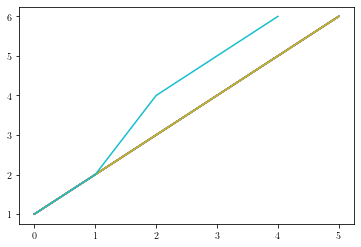

In [101]:
for subject in subjects:
    df = gmhi2_scores.loc[subject].sort_values("time")
    plt.plot(np.arange(df.shape[0]), df["time"])